In [2]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/STKI-Project/Minggu4/Dataset_Berita_Ekonomi.csv"
dataset = pd.read_csv(file_path)
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,kategori,judul,isi,tanggal,sumber,sentimen,kata_kunci
0,105,ekonomi,Investasi Asing Masuk Capai Rekor Baru,Investor global kembali melirik pasar Indonesi...,2025-04-28,Finansial News,positif,"investasi, peningkatan, pertumbuhan, rupiah, s..."
1,172,ekonomi,Pertumbuhan Ekonomi Nasional Meningkat,"Nilai tukar rupiah menguat terhadap dolar AS, ...",2025-06-27,Market Insight,positif,"peningkatan, pasar saham, rupiah, surplus, sta..."
2,301,ekonomi,Investasi Asing Masuk Capai Rekor Baru,Ekonomi Indonesia menunjukkan tanda-tanda pemu...,2023-08-16,Investor Daily,positif,"stabilitas, pertumbuhan, peningkatan, pasar sa..."
3,96,ekonomi,"Inflasi Naik, Harga Pangan Semakin Mahal",Krisis energi yang melanda kawasan Asia menuru...,2024-02-17,Bisnis Today,negatif,"inflasi, defisit, PHK, utang, penurunan"
4,448,ekonomi,Investasi Asing Masuk Capai Rekor Baru,Peningkatan daya beli masyarakat dan dukungan ...,2025-02-09,Bisnis Today,positif,"rupiah, pertumbuhan, peningkatan, stabilitas, ..."


In [3]:
dataset.shape #perbandingan isi dan label

(460, 8)

In [5]:
dataset_feature = dataset['isi'].astype(str)
dataset_label = dataset['sentimen']
dataset_feature

,isi
0,Investor global kembali melirik pasar Indonesi...
1,"Nilai tukar rupiah menguat terhadap dolar AS, ..."
2,Ekonomi Indonesia menunjukkan tanda-tanda pemu...
3,Krisis energi yang melanda kawasan Asia menuru...
4,Peningkatan daya beli masyarakat dan dukungan ...
...,...
455,Ekonomi Indonesia menunjukkan tanda-tanda pemu...
456,"Nilai tukar rupiah menguat terhadap dolar AS, ..."
457,Krisis energi yang melanda kawasan Asia menuru...
458,Nilai tukar rupiah kembali melemah akibat sent...


In [6]:
dataset_label

,sentimen
0,positif
1,positif
2,positif
3,negatif
4,positif
...,...
455,positif
456,positif
457,negatif
458,negatif


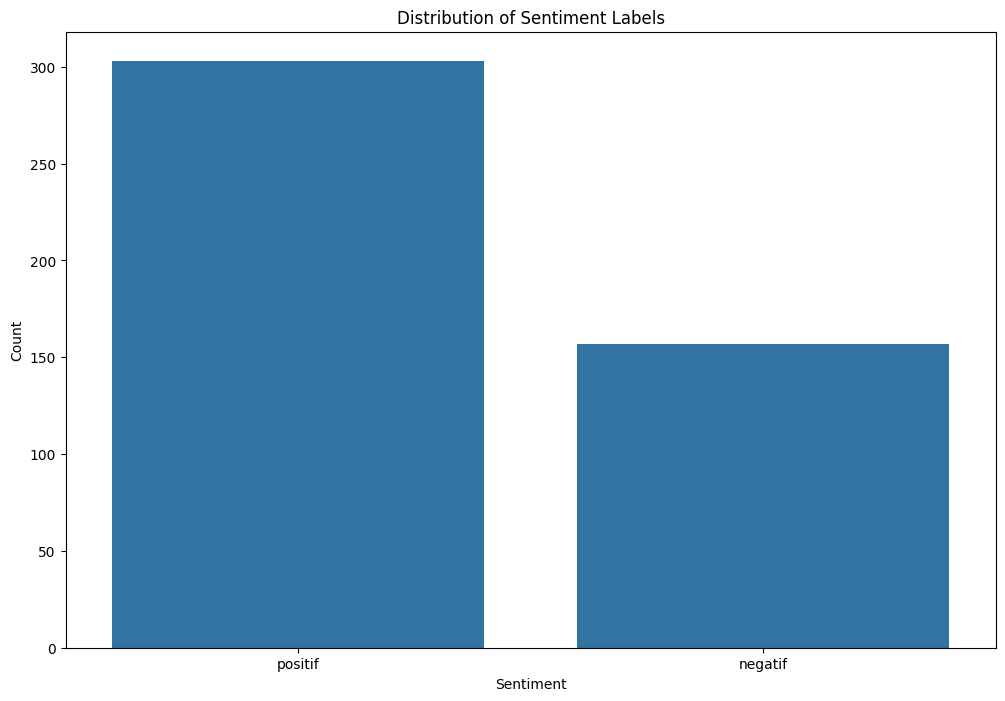

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,8))
sns.countplot(x=dataset_label, order=dataset_label.value_counts().index)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [9]:
dataset_label.value_counts()

,count
sentimen,
positif,303
negatif,157


#Bags of Word (BOW)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset_feature)
print(vectorizer.get_feature_names_out())

['akibat' 'analis' 'arus' 'as' 'asia' 'asing' 'barang' 'beli' 'cadangan'
 'cukup' 'dalam' 'dampak' 'dan' 'daya' 'defisit' 'devisa' 'didukung'
 'diminta' 'dolar' 'domestik' 'dukungan' 'dunia' 'efektif' 'ekonomi'
 'ekspor' 'energi' 'faktor' 'fiskal' 'global' 'harga' 'hubungan' 'impor'
 'indonesia' 'industri' 'inflasi' 'investasi' 'investor' 'jangka' 'karena'
 'kawasan' 'kebijakan' 'kembali' 'kenaikan' 'kerja' 'ketidakpastian'
 'krisis' 'kuat' 'langkah' 'manufaktur' 'massal' 'masuk' 'masyarakat'
 'melakukan' 'melanda' 'melemah' 'melirik' 'membuat' 'menarik' 'menekan'
 'mengalami' 'mengambil' 'menguat' 'menilai' 'meningkat' 'menjadi'
 'menjaga' 'menunjukkan' 'menurunkan' 'menurunnya' 'modal' 'naiknya'
 'nasional' 'nilai' 'oleh' 'pangan' 'panjang' 'pasar' 'pemerintah'
 'pemulihan' 'pemutusan' 'penggerak' 'peningkatan' 'penurunan'
 'perdagangan' 'permintaan' 'pertumbuhan' 'perusahaan' 'potensi'
 'produksi' 'rupiah' 'segera' 'seiring' 'sejumlah' 'sentimen' 'setelah'
 'sosial' 'stabilitas' 'st

In [11]:
print(X.toarray())

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [14]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(dataset_feature)
print(vectorizer2.get_feature_names_out())

['akibat sentimen' 'analis menilai' 'arus masuk' 'as didukung'
 'asia menurunkan' 'asing dan' 'barang modal' 'beli masyarakat'
 'cadangan devisa' 'cukup efektif' 'dalam menjaga' 'dampak sosial'
 'dan dukungan' 'dan energi' 'dan naiknya' 'dan peningkatan'
 'dan tingginya' 'daya beli' 'defisit perdagangan' 'devisa nasional'
 'didukung oleh' 'diminta segera' 'dolar as' 'dukungan stimulus'
 'efektif dalam' 'ekonomi dunia' 'ekonomi indonesia' 'ekonomi menjadi'
 'ekspor dan' 'energi membuat' 'energi yang' 'faktor utama'
 'fiskal pemerintah' 'global analis' 'global dan' 'global kembali'
 'harga impor' 'harga pangan' 'hubungan kerja' 'impor barang'
 'indonesia karena' 'indonesia menunjukkan' 'industri nasional'
 'inflasi meningkat' 'investasi asing' 'investor global' 'jangka panjang'
 'karena menurunnya' 'karena potensi' 'kawasan asia' 'kebijakan fiskal'
 'kembali melemah' 'kembali melirik' 'kenaikan harga' 'kerja massal'
 'ketidakpastian ekonomi' 'krisis energi' 'kuat setelah' 'langkah untuk'

In [15]:
print(X2.toarray())

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#Simulasi Corpus

In [16]:
corpus = [
    'This is the first Document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [18]:
vectorizer = CountVectorizer()
Z = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [19]:
print(Z.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [20]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
Z2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [21]:
print(Z2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


#TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(dataset_feature)

print(X.shape)

(460, 107)


In [27]:
features = tfidf_vectorizer.get_feature_names_out()
features

array(['akibat', 'analis', 'arus', 'as', 'asia', 'asing', 'barang',
       'beli', 'cadangan', 'cukup', 'dalam', 'dampak', 'dan', 'daya',
       'defisit', 'devisa', 'didukung', 'diminta', 'dolar', 'domestik',
       'dukungan', 'dunia', 'efektif', 'ekonomi', 'ekspor', 'energi',
       'faktor', 'fiskal', 'global', 'harga', 'hubungan', 'impor',
       'indonesia', 'industri', 'inflasi', 'investasi', 'investor',
       'jangka', 'karena', 'kawasan', 'kebijakan', 'kembali', 'kenaikan',
       'kerja', 'ketidakpastian', 'krisis', 'kuat', 'langkah',
       'manufaktur', 'massal', 'masuk', 'masyarakat', 'melakukan',
       'melanda', 'melemah', 'melirik', 'membuat', 'menarik', 'menekan',
       'mengalami', 'mengambil', 'menguat', 'menilai', 'meningkat',
       'menjadi', 'menjaga', 'menunjukkan', 'menurunkan', 'menurunnya',
       'modal', 'naiknya', 'nasional', 'nilai', 'oleh', 'pangan',
       'panjang', 'pasar', 'pemerintah', 'pemulihan', 'pemutusan',
       'penggerak', 'peningkatan', 

In [29]:
idfValues = tfidf_vectorizer.idf_
d = dict(zip(features, 9 - idfValues))
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)
for i in range(100):
    print(sortedDict[i])

('dan', np.float64(7.431122364326045))
('ekonomi', np.float64(7.260229503355713))
('yang', np.float64(7.019893551501131))
('peningkatan', np.float64(7.014096433816805))
('global', np.float64(6.996500671926425))
('pasar', np.float64(6.9480063219878145))
('pertumbuhan', np.float64(6.92284776235166))
('indonesia', np.float64(6.756951085225105))
('nasional', np.float64(6.654093699785397))
('nilai', np.float64(6.620192148109716))
('rupiah', np.float64(6.620192148109716))
('tukar', np.float64(6.620192148109716))
('kembali', np.float64(6.481722473844611))
('beli', np.float64(6.399201450156608))
('daya', np.float64(6.399201450156608))
('domestik', np.float64(6.399201450156608))
('dukungan', np.float64(6.399201450156608))
('faktor', np.float64(6.399201450156608))
('karena', np.float64(6.399201450156608))
('masyarakat', np.float64(6.399201450156608))
('menjadi', np.float64(6.399201450156608))
('penggerak', np.float64(6.399201450156608))
('stimulus', np.float64(6.399201450156608))
('utama', np.fl

Ana

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram (dua kata)
vectorizer_bi = CountVectorizer(ngram_range=(2,2))
X_bi = vectorizer_bi.fit_transform(dataset_feature)
bi_freq = X_bi.toarray().sum(axis=0)
bi_df = pd.DataFrame({'Bigram': vectorizer_bi.get_feature_names_out(), 'Frequency': bi_freq})
bi_df = bi_df.sort_values(by='Frequency', ascending=False)
print("🔹 10 Bigram Paling Umum:")
print(bi_df.head(10))

🔹 10 Bigram Paling Umum:
                    Bigram  Frequency
118           tukar rupiah        115
81             nilai tukar        115
7          beli masyarakat         92
27         ekonomi menjadi         92
23       dukungan stimulus         92
31            faktor utama         92
110       stimulus ekonomi         92
96    pertumbuhan domestik         92
62          masyarakat dan         92
90   penggerak pertumbuhan         92
